![image.png](attachment:image.png)

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
# Carregar dados de treinamento e teste
X_train = pd.read_csv('X_train_processed.csv')
X_test = pd.read_csv('X_test_processed.csv')

### 2. Calcule os ```ccp_alphas```.

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

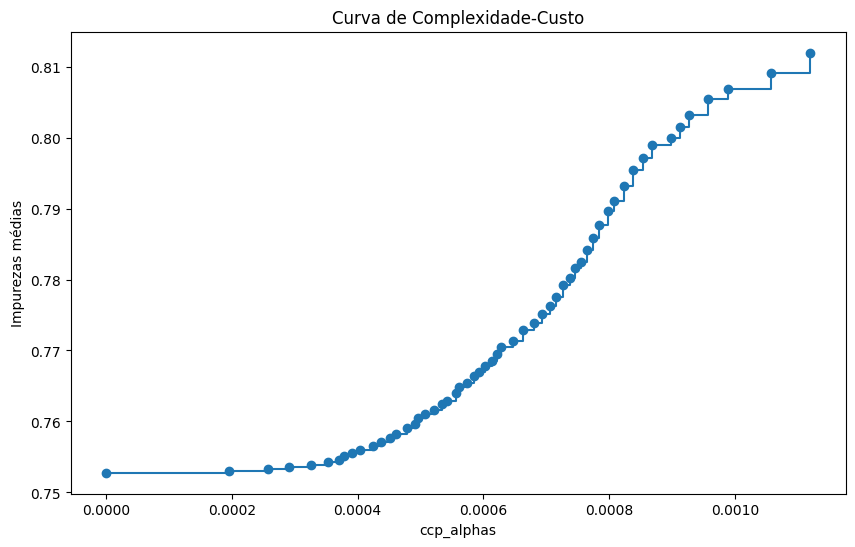

CPU times: user 1.04 s, sys: 112 ms, total: 1.15 s
Wall time: 1.05 s


In [38]:
%%time
# Carregar os dados de treinamento
X_train = pd.read_csv('X_train_processed.csv')

# Selecionar as três melhores variáveis
best_features = ['1 tBodyAcc-mean()-X', '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z']

# Selecionar os dados de treinamento apenas com as melhores variáveis
X_train_selected = X_train[best_features]

# Carregar os rótulos de treinamento
y_train = pd.read_csv('/content/sample_data/y_test.txt', header=None, names=['Activity'])

# Carregar os rótulos de teste
y_test = pd.read_csv('/content/sample_data/y_test.txt', header=None, names=['Activity'])

# Ajustar o número de amostras nos dados de treinamento
X_train_selected = X_train_selected.iloc[:len(y_train)]

# Inicializar o classificador de árvore de decisão com min_samples_leaf=20
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

# Utilizar validação cruzada estratificada para calcular os ccp_alphas
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Calcular ccp_alphas e impurities para cada dobra
ccp_alphas_per_fold, impurities_per_fold = [], []
for train_index, val_index in cv.split(X_train_selected, y_train['Activity']):
    X_train_fold, X_val_fold = X_train_selected.iloc[train_index], X_train_selected.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    clf.fit(X_train_fold, y_train_fold)
    ccp_alphas_fold = clf.cost_complexity_pruning_path(X_train_fold, y_train_fold)['ccp_alphas']
    impurities_fold = clf.cost_complexity_pruning_path(X_train_fold, y_train_fold)['impurities']

    ccp_alphas_per_fold.append(ccp_alphas_fold)
    impurities_per_fold.append(impurities_fold)

# Encontrar o comprimento mínimo entre todas as dobras
min_length = min(map(len, ccp_alphas_per_fold + impurities_per_fold))

# Ajustar o tamanho das listas para que todas tenham o mesmo comprimento
ccp_alphas_per_fold = [fold[:min_length] for fold in ccp_alphas_per_fold]
impurities_per_fold = [fold[:min_length] for fold in impurities_per_fold]

# Calcular a média das ccp_alphas e impurities
ccp_alphas = np.mean(ccp_alphas_per_fold, axis=0)
impurities = np.mean(impurities_per_fold, axis=0)

# Plotar o gráfico de ccp_alphas vs. impurezas
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alphas")
plt.ylabel("Impurezas médias")
plt.title("Curva de Complexidade-Custo")
plt.show()

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

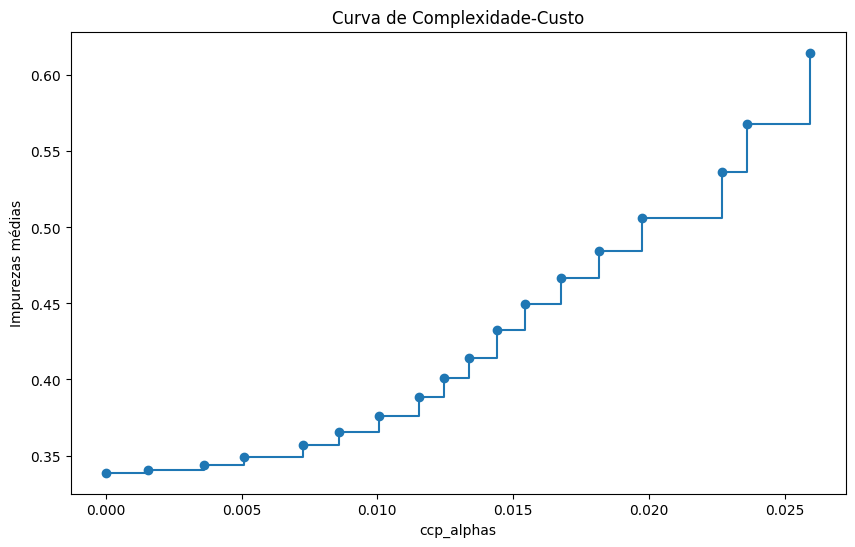

Tempo de execução: 182.176513671875 segundos


In [64]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import matplotlib.pyplot as plt

# Carregar dados de treinamento
X_train = pd.read_csv('X_train_processed.csv')
y_train = pd.read_csv('/content/sample_data/y_test.txt', header=None, names=['Activity'])

# Escolher um tamanho maior para o conjunto de treinamento
# Neste exemplo, estou usando as primeiras 1000 amostras, mas você pode ajustar conforme necessário.
X_train_selected = X_train.head(1000)
y_train_selected = y_train.head(1000)

# Dividir os dados em treinamento e teste
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_selected, y_train_selected['Activity'], test_size=0.2, random_state=42)

# Inicializar o classificador de árvore de decisão com min_samples_leaf=20
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

# Utilizar validação cruzada estratificada para calcular os ccp_alphas
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Calcular ccp_alphas e impurities para cada dobra
ccp_alphas_per_fold, impurities_per_fold = [], []
for train_index, val_index in cv.split(X_train_split, y_train_split):
    X_train_fold, X_val_fold = X_train_split.iloc[train_index], X_train_split.iloc[val_index]
    y_train_fold, y_val_fold = y_train_split.iloc[train_index], y_train_split.iloc[val_index]

    clf.fit(X_train_fold, y_train_fold)
    ccp_alphas_fold = clf.cost_complexity_pruning_path(X_train_fold, y_train_fold)['ccp_alphas']
    impurities_fold = clf.cost_complexity_pruning_path(X_train_fold, y_train_fold)['impurities']

    ccp_alphas_per_fold.append(ccp_alphas_fold)
    impurities_per_fold.append(impurities_fold)

# Encontrar o comprimento mínimo entre todas as dobras
min_length = min(map(len, ccp_alphas_per_fold + impurities_per_fold))

# Ajustar o tamanho das listas para que todas tenham o mesmo comprimento
ccp_alphas_per_fold = [fold[:min_length] for fold in ccp_alphas_per_fold]
impurities_per_fold = [fold[:min_length] for fold in impurities_per_fold]

# Calcular a média das ccp_alphas e impurities
ccp_alphas = np.mean(ccp_alphas_per_fold, axis=0)
impurities = np.mean(impurities_per_fold, axis=0)

# Plotar o gráfico de ccp_alphas vs. impurezas
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alphas")
plt.ylabel("Impurezas médias")
plt.title("Curva de Complexidade-Custo")
plt.show()

# Definir os parâmetros para Grid Search
param_grid = {
    'ccp_alpha': ccp_alphas[::10],  # Ler 1 a cada 10 valores para uma melhor varredura
    'max_features': [None, 'sqrt', 'log2']
}

# Inicializar o classificador de árvore de decisão para Grid Search
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

# Inicializar Grid Search
grid_search = GridSearchCV(clf, param_grid, cv=cv)

# Executar o Grid Search nos dados de treinamento
grid_search.fit(X_train_split, y_train_split)

# Calcular o tempo de execução
end_time = time.time()
execution_time = end_time - start_time
print(f"Tempo de execução: {execution_time} segundos")


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

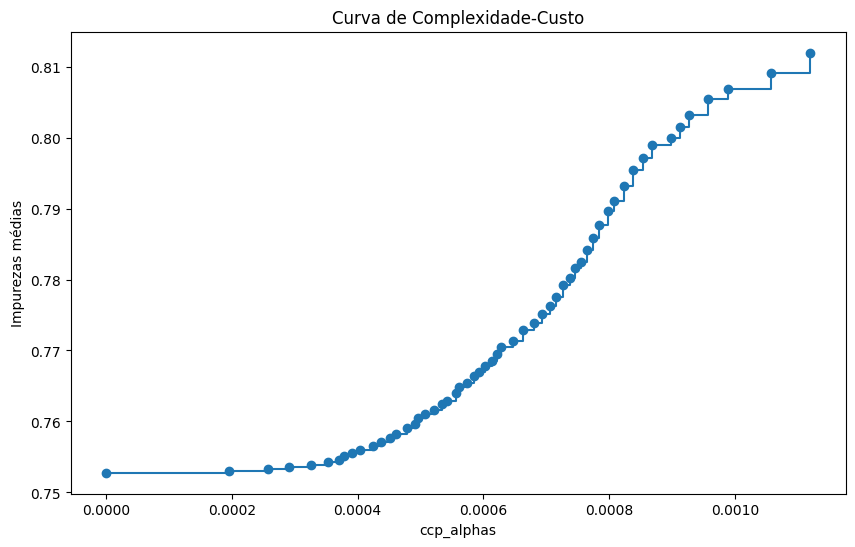

Tempo de execução: 1.863698959350586 segundos
Acurácia na base de teste: 0.11


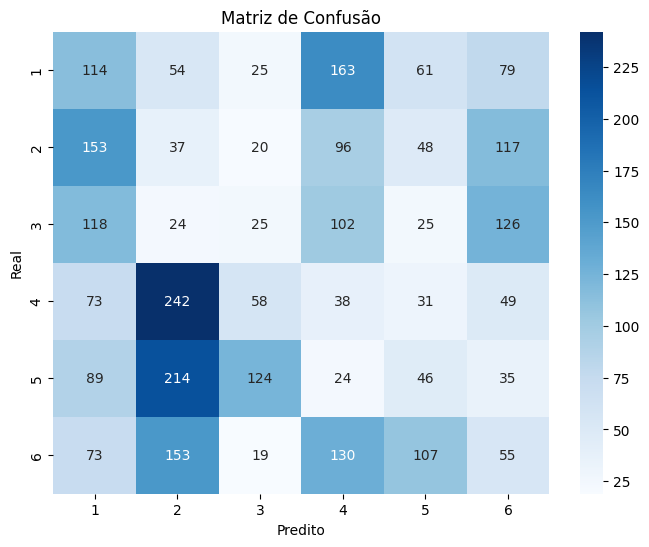

In [71]:
import time
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Carregar dados de treinamento e teste
X_train = pd.read_csv('X_train_processed.csv')
X_test = pd.read_csv('X_test_processed.csv')

# Selecionar as três melhores variáveis
best_features = ['1 tBodyAcc-mean()-X', '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z']

# Selecionar os dados de treinamento apenas com as melhores variáveis
X_train_selected = X_train[best_features]

# Carregar os rótulos de treinamento
y_train = pd.read_csv('/content/sample_data/y_test.txt', header=None, names=['Activity'])

# Carregar os rótulos de teste
y_test = pd.read_csv('/content/sample_data/y_test.txt', header=None, names=['Activity'])

# Ajustar o número de amostras nos dados de treinamento
X_train_selected = X_train_selected.iloc[:len(y_train)]

# Inicializar o classificador de árvore de decisão com min_samples_leaf=20
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

# Utilizar validação cruzada estratificada para calcular os ccp_alphas
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Calcular ccp_alphas e impurities para cada dobra
ccp_alphas_per_fold, impurities_per_fold = [], []
for train_index, val_index in cv.split(X_train_selected, y_train['Activity']):
    X_train_fold, X_val_fold = X_train_selected.iloc[train_index], X_train_selected.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    clf.fit(X_train_fold, y_train_fold)
    ccp_alphas_fold = clf.cost_complexity_pruning_path(X_train_fold, y_train_fold)['ccp_alphas']
    impurities_fold = clf.cost_complexity_pruning_path(X_train_fold, y_train_fold)['impurities']

    ccp_alphas_per_fold.append(ccp_alphas_fold)
    impurities_per_fold.append(impurities_fold)

# Encontrar o comprimento mínimo entre todas as dobras
min_length = min(map(len, ccp_alphas_per_fold + impurities_per_fold))

# Ajustar o tamanho das listas para que todas tenham o mesmo comprimento
ccp_alphas_per_fold = [fold[:min_length] for fold in ccp_alphas_per_fold]
impurities_per_fold = [fold[:min_length] for fold in impurities_per_fold]

# Calcular a média das ccp_alphas e impurities
ccp_alphas = np.mean(ccp_alphas_per_fold, axis=0)
impurities = np.mean(impurities_per_fold, axis=0)

# Plotar o gráfico de ccp_alphas vs. impurezas
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alphas")
plt.ylabel("Impurezas médias")
plt.title("Curva de Complexidade-Custo")
plt.show()

# Definir os parâmetros para Grid Search
param_grid = {
    'ccp_alpha': ccp_alphas[::10],  # Ler 1 a cada 10 valores para uma melhor varredura
    'max_features': [None, 'sqrt', 'log2']
}

# Inicializar o classificador de árvore de decisão para Grid Search
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

# Inicializar Grid Search
grid_search = GridSearchCV(clf, param_grid, cv=cv)

# Medir o tempo de execução
start_time = time.time()

# Executar o Grid Search nos dados de treinamento
grid_search.fit(X_train_selected, y_train['Activity'])

# Calcular o tempo de execução
end_time = time.time()
execution_time = end_time - start_time
print(f"Tempo de execução: {execution_time} segundos")

# Obter o melhor modelo após o Grid Search
best_model = grid_search.best_params_

# Treinar o melhor modelo em toda a base de treino
best_model = DecisionTreeClassifier(ccp_alpha=best_model['ccp_alpha'], max_features=best_model['max_features'], min_samples_leaf=20, random_state=42)
best_model.fit(X_train_selected, y_train['Activity'])

# Obter as previsões na base de teste
X_test_selected = X_test[best_features]
y_pred = best_model.predict(X_test_selected)

# Calcular a acurácia
accuracy = accuracy_score(y_test['Activity'], y_pred)
print(f'Acurácia na base de teste: {accuracy:.2f}')

# Visualizar a matriz de confusão
cm = confusion_matrix(y_test['Activity'], y_pred)

# Criar um heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()
